<a href="https://colab.research.google.com/github/pankajkumaryadav-ai-ds/ML-LAB/blob/main/Multi_regression_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
#https://www.kaggle.com/code/ayushsarraf0731/multiple-linear-regression-on-50-startup-dataset


In [17]:
import io # io is a standard library no need to install it separately using pip
from google.colab import files# files is an object obtaining from google.colab module
# show the form to upload a file
dataset = pd.read_csv('50_Startups.csv') # performing input operation by 

## Print first 10 rows 
dataset.head(10)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [18]:
dataset.shape

(50, 5)

In [ ]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [19]:
y=dataset.pop('Profit')
X=dataset

In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


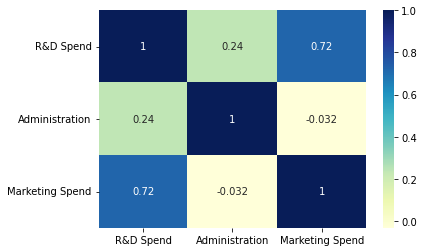

In [22]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [23]:
status=pd.get_dummies(dataset['State'],drop_first=True)
status.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [24]:
dataset=pd.concat([dataset,status],axis=1)
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,1
1,162597.70,151377.59,443898.53,California,0,0
2,153441.51,101145.55,407934.54,Florida,1,0
3,144372.41,118671.85,383199.62,New York,0,1
4,142107.34,91391.77,366168.42,Florida,1,0


In [25]:
dataset.drop(['State'],axis=1,inplace=True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,y,train_size=0.8,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [29]:
testing_data_model_score = lr.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = lr.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9347068473282423
Model Score/Performance on Training data 0.9501847627493607


In [30]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
28,103015.201598,103282.38
11,132582.277608,144259.40
10,132447.738452,146121.95
41,71976.098513,77798.83
2,178537.482211,191050.39
27,116161.242302,105008.31
38,67851.692097,81229.06
31,98791.733747,97483.56
22,113969.435330,110352.25
4,167921.065696,166187.94


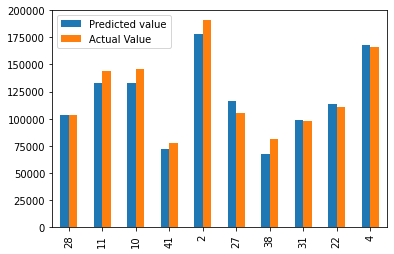

In [31]:
df.head(10).plot(kind = 'bar')

In [32]:
d = y_test - y_pred
mae_f = np.mean(abs(d))
mse_f = np.mean(d**2)
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y_test-np.mean(y_test))**2))

def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape
mape_error = mape(y_test, y_pred) 

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)
print("MAPE:", mape_error)

Results by manual calculation:
MAE: 7514.293659640614
MSE: 83502864.03257766
RMSE: 9137.99015279496
R-Squared: 0.9347068473282423
MAPE: 0.06449754085355505
